In [27]:
import io
import os
import zipfile
import pickle
from urllib.request import urlopen
from urllib.parse import urlparse

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [28]:
def fetch_speeches(years):
    paths = ['https://bis.org/speeches/speeches_' + str(year) + '.zip' for year in years]
    speeches = pd.DataFrame()

    for path in paths:
        remotezip = urlopen(path) # read the zip file as a string
        zipinmemory = io.BytesIO(remotezip.read()) # convert from a string to bytes
        zip = zipfile.ZipFile(zipinmemory) # pass the bytes to python's zipfile handler
        
        # read the excel spreadsheet
        xlsx_path = zip.namelist()[0] # get the name of the excel file
        with zip.open(xlsx_path) as f:
            data = pd.read_csv(f)

        data['id'] = [('').join(os.path.basename(urlparse(url).path).split('.')[:-1]) for url in data['url']]   
        speeches = pd.concat([speeches, data])
    return speeches

def summation_score(classifier, weight):
   classifier[classifier > 0] *= weight
   try:
      score = sum(classifier) / len(classifier)
      return score
   except:
      return np.nan

In [29]:
with open('parameters.pkl', 'rb') as f:
    parameters = pickle.load(f)

In [31]:
data = pd.read_csv('all.csv')
#data = data.drop('text', axis=1)

In [32]:
#data.to_csv('all_data_.csv')

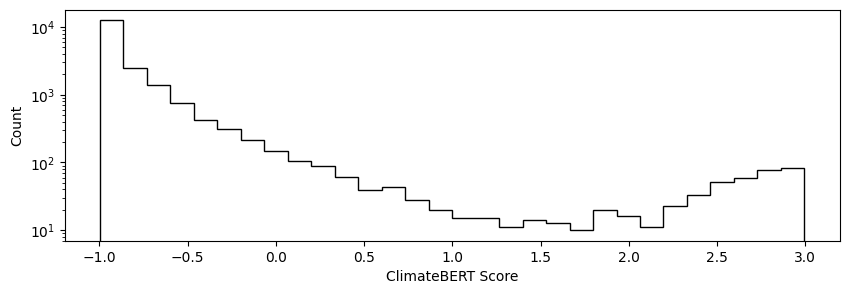

In [33]:
plt.figure(figsize=(10,3))
plt.hist(data['climatebert_scores'], color = 'k', histtype='step', bins=30)
plt.xlabel('ClimateBERT Score')
plt.ylabel('Count')
plt.yscale('log')

In [38]:
climate_speeches = data[data['climatebert_scores'] > 1.5]
print(len(climate_speeches))

401


In [39]:
climate_speeches.head()

,Unnamed: 0,url,title,description,date,author,id,climatebert_scores
712,21,https://www.bis.org/review/r001129c.pdf,Environmental issues and their implications fo...,"Keynote Speech by Mr David Carse, Deputy Chief...",2000-11-29 00:00:00,David Carse,r001129c,2.994957
1125,136,https://www.bis.org/review/r010629a.pdf,Alan Greenspan: Impact of energy on the economy,"Remarks by Mr Alan Greenspan, Chairman of the ...",2001-06-28 00:00:00,Alan Greenspan,r010629a,2.462214
2003,26,https://www.bis.org/review/r041229a.pdf,Jean-Pierre Roth: International monetary polic...,"Summary of a speech by Mr Jean Pierre Roth, Ch...",2004-12-06 00:00:00,Jean-Pierre Roth,r041229a,2.321586
2006,29,https://www.bis.org/review/r041223g.pdf,Caleb M Fundanga: Economic and environmental g...,"Speech by Dr Caleb M Fundanga, Governor of the...",2004-11-03 00:00:00,Caleb M Fundanga,r041223g,2.889234
2055,78,https://www.bis.org/review/r041122c.pdf,Philipp M Hildebrand: Monetary policy and oil ...,"Speech by Mr Philipp M Hildebrand, Member of t...",2004-11-18 00:00:00,Philipp Hildebrand,r041122c,1.506405


In [40]:
parameters['r010629a']

array([ 0.98525721,  0.99449325,  0.99714309,  0.99562293,  0.70619231,
       -0.86230665,  0.50602657, -0.56856167,  0.99319673,  0.99180192,
        0.90004653,  0.98878235,  0.99513477,  0.90663201,  0.99621117,
        0.99729794,  0.94029081, -0.65129417,  0.98740804,  0.99354762,
        0.99604577,  0.99847406,  0.99823916,  0.99653578,  0.99733943,
        0.99795341,  0.99431026])

In [41]:
climate_speeches[['url', 'climatebert_scores']]

,url,climatebert_scores
712,https://www.bis.org/review/r001129c.pdf,2.994957
1125,https://www.bis.org/review/r010629a.pdf,2.462214
2003,https://www.bis.org/review/r041229a.pdf,2.321586
2006,https://www.bis.org/review/r041223g.pdf,2.889234
2055,https://www.bis.org/review/r041122c.pdf,1.506405
...,...,...
19100,https://www.bis.org/review/r240607a.htm,2.374079
19105,https://www.bis.org/review/r240604c.htm,2.810636
19128,https://www.bis.org/review/r240619e.htm,2.993458
19141,https://www.bis.org/review/r240621h.htm,2.249453
